# COSMOS and GOODS-S Morphology from 3D-SHT and Xray information from CHANDRA

In this notebook, I take the most general sample created for COSMOS and GOODS-S fields and I crossmatch them with the 3D-HST morphology database created by Arjen van der Wel as part of the 3D-HST project for the CANDELS fields and information available from the CHANDRA database. 

-------------------------------------------------------------------------------------------------------------------

Morphology: http://www.mpia.de/homes/vdwel/3dhstcandels.html

http://www.mpia.de/homes/vdwel/candels.html

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

X-ray:https://arxiv.org/pdf/1512.00510.pdf

http://www.mpia.de/homes/vdwel/candels.html

https://arxiv.org/pdf/1512.00510.pdf

https://arxiv.org/pdf/1512.00510.pdf

COSMOS Xray: https://arxiv.org/pdf/1512.00510.pdf

https://irsa.ipac.caltech.edu/data/COSMOS/tables/xmm/

https://irsa.ipac.caltech.edu/data/COSMOS/tables/chandra/

GOODS-S Xray: http://www.astrodeep.eu/data/

https://arxiv.org/pdf/1512.00510.pdf

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------



In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd

%matplotlib inline

# COSMOS and GOODS-S final sample

In [2]:
#GOODS-S
#=================================================================================================================
GOODSS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/GOODS-fields/'
                                 'GOODSS_final_sample_CIGALE.fits', format = 'fits')

#COSMOS
#=================================================================================================================

# The 'final_sample.fits' file in /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/
# has all the information without being filtered yet! + RA and DEC information
# However, COSMOS_final.fits is the same but ready for CIGALE-analysis 

# No-Resdshift restricted
COSMOS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS'
                        '/CIGALE_file/COSMOS_final.fits', format='fits')

In [3]:
columns_goodss = ['UVIMOS','UVIMOS_err','hst.wfc.F435W','hst.wfc.F435W_err',\
           'hst.wfc.F606W','hst.wfc.F606W_err','hst.wfc.F755W','hst.wfc.F755W_err',\
           'hst.wfc.F814W','hst.wfc.F814W_err','ACS_F850LP','ACS_F850LP_err',\
           'WFC3_F098M','WFC3_F098M_err','WFC3_F105W','WFC3_F105W_err',\
           'hst.wfc3.F125W','hst.wfc3.F125W_err','hst.wfc3.F160W','hst.wfc3.F160W_err',\
           'ISAACKs','ISAACKs_err','spitzer.irac.ch1','spitzer.irac.ch1_err',\
           'spitzer.irac.ch2','spitzer.irac.ch2_err','spitzer.irac.ch3','spitzer.irac.ch3_err',\
           'spitzer.irac.ch4','spitzer.irac.ch4_err','spitzer.mips.24','spitzer.mips.24_err',\
           'herschel.pacs.70','herschel.pacs.70_err','herschel.pacs.100','herschel.pacs.100_err',\
           'herschel.pacs.160','herschel.pacs.160_err','herschel.spire.PSW','herschel.spire.PSW_err',\
           'herschel.spire.PMW','herschel.spire.PMW_err','herschel.spire.PLW','herschel.spire.PLW_err',\
           'line.NII-654.8+line.H-alpha+line.NII-658.4','line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
           'line.H-beta','line.H-beta_err',\
           'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
           'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
           'line.OIII-500.7','line.OIII-500.7_err']

columns_cosmos = ['galex.NUV','galex.NUV_err','cfht.megacam.u','cfht.megacam.u_err',\
           'subaru.suprime.B','subaru.suprime.B_err','subaru.suprime.V','subaru.suprime.V_err',\
           'subaru.suprime.r','subaru.suprime.r_err','subaru.suprime.i','subaru.suprime.i_err',\
           'subaru.suprime.z','subaru.suprime.z_err','subaru.hsc.y','subaru.hsc.y_err',\
           'UKIRT_WFCJ','UKIRT_WFCJ_err','cfht.wircam.H','cfht.wircam.H_err',\
           'WFCAM_K','WFCAM_K_err','IRAC1','IRAC1_err',\
           'IRAC2','IRAC2_err','IRAC3','IRAC3_err','IRAC4','IRAC4_err',\
           'spitzer.mips.24','spitzer.mips.24_err','herschel.pacs.100','herschel.pacs.100_err',\
           'herschel.pacs.160','herschel.pacs.160_err','herschel.spire.PSW','herschel.spire.PSW_err',\
           'herschel.spire.PMW','herschel.spire.PMW_err','herschel.spire.PLW','herschel.spire.PLW_err',\
           'line.NII-654.8+line.H-alpha+line.NII-658.4',\
           'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
           'line.H-beta','line.H-beta_err',\
           'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
           'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
           'line.OIII-500.7','line.OIII-500.7_err']

# COSMOS and GOODS-S Morphology sample

In [ ]:
# the Morphology files F160W are corssmatched to the final samples for 
# COSMOS/GOODS-S using the files with coordinates !!!! 

# '/home/jvilla/Documents/PhD_2018/3DHST_Data/GOODS-fields/GOODSS_final_sample_CIGALE_RADEC.fits'

# '/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/COSMOS_final_RADEC.fits'

In [6]:
cosmos_f125 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/cos_2epoch_wfc3_f125w_060mas_v1.0_galfit.cat', format = 'ascii')

cosmos_f160 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/cos_2epoch_wfc3_f160w_060mas_v1.0_galfit.cat', format = 'ascii')

cosmos_f125 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/cos_2epoch_wfc3_f125w_060mas_v1.0_galfit.cat', format = 'ascii')



goodss_f105 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/gs_all_candels_ers_udf_f105w_v0.5_galfit.cat', format = 'ascii')

goodss_f125 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/gs_all_candels_ers_udf_f125w_v0.5_galfit.cat', format = 'ascii')

goodss_f160 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/gs_all_candels_ers_udf_f160w_v0.5_galfit.cat', format = 'ascii')

In [7]:
goodss_f160.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/gs_all_candels_ers_udf_f160w_v0.5_galfit.fits', format = 'fits', overwrite = True)

In [8]:
cosmos_f160.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/cos_2epoch_wfc3_f160w_060mas_v1.0_galfit.fits', format = 'fits', overwrite = True)

# COSMOS and GOODS-S + Morphology F160w

In [8]:
cosmos = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/COSMOS_f160w_060mas_v1.0_galfit.fits', format = 'fits')

goodss = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                         'Morphology-CANDELS-fields/GOODS-S_f160w_v0.5_galfit.fits', format = 'fits')

# COSMOS and GOODS-S subsample with SNR > 3 in H$_\alpha$ and [OIII]
# Morphology is also kept at this stage

In [9]:
# Final sample to be used for scientific analysis

Final_CIGALE = cosmos[(cosmos['line.NII-654.8+line.H-alpha+line.NII-658.4']/cosmos['line.NII-654.8+line.H-alpha+line.NII-658.4_err'] > 3) &\
                     (cosmos['line.OIII-500.7']/cosmos['line.OIII-500.7_err'] > 3)]

cosmos_final = Table([Final_CIGALE['id'], Final_CIGALE['redshift'],\
                      Final_CIGALE['galex.NUV'], Final_CIGALE['galex.NUV_err'],\
                      Final_CIGALE['cfht.megacam.u'], Final_CIGALE['cfht.megacam.u_err'],\
                      Final_CIGALE['subaru.suprime.B'], Final_CIGALE['subaru.suprime.B_err'],\
                      Final_CIGALE['subaru.suprime.V'], Final_CIGALE['subaru.suprime.V_err'],\
                      Final_CIGALE['subaru.suprime.r'], Final_CIGALE['subaru.suprime.r_err'],\
                      Final_CIGALE['subaru.suprime.i'], Final_CIGALE['subaru.suprime.i_err'],\
                      Final_CIGALE['subaru.suprime.z'], Final_CIGALE['subaru.suprime.z_err'],\
                      Final_CIGALE['subaru.hsc.y'], Final_CIGALE['subaru.hsc.y_err'],\
                      Final_CIGALE['UKIRT_WFCJ'], Final_CIGALE['UKIRT_WFCJ_err'],\
                      Final_CIGALE['cfht.wircam.H'], Final_CIGALE['cfht.wircam.H_err'],\
                      Final_CIGALE['WFCAM_K'], Final_CIGALE['WFCAM_K_err'],\
                      Final_CIGALE['IRAC1'], Final_CIGALE['IRAC1_err'],\
                      Final_CIGALE['IRAC2'], Final_CIGALE['IRAC2_err'],\
                      Final_CIGALE['IRAC3'], Final_CIGALE['IRAC3_err'],\
                      Final_CIGALE['IRAC4'], Final_CIGALE['IRAC4_err'],\
                      Final_CIGALE['spitzer.mips.24'], Final_CIGALE['spitzer.mips.24_err'],\
                      Final_CIGALE['herschel.pacs.100'], Final_CIGALE['herschel.pacs.100_err'],\
                      Final_CIGALE['herschel.pacs.160'], Final_CIGALE['herschel.pacs.160_err'],\
                      Final_CIGALE['herschel.spire.PSW'], Final_CIGALE['herschel.spire.PSW_err'],\
                      Final_CIGALE['herschel.spire.PMW'], Final_CIGALE['herschel.spire.PMW_err'],\
                      Final_CIGALE['herschel.spire.PLW'], Final_CIGALE['herschel.spire.PLW_err'],\
                      Final_CIGALE['line.NII-654.8+line.H-alpha+line.NII-658.4'],\
                      Final_CIGALE['line.NII-654.8+line.H-alpha+line.NII-658.4_err'],\
                      Final_CIGALE['line.H-beta'], Final_CIGALE['line.H-beta_err'],\
                      Final_CIGALE['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                      Final_CIGALE['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                      Final_CIGALE['line.OIII-500.7'], Final_CIGALE['line.OIII-500.7_err']],\
               names = ('id','redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
          'Ha_OII_Samples-Morphology/COSMOS_HaOIII.fits')
cosmos_final.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
          'Ha_OII_Samples-Morphology/COSMOS_HaOIII.fits', format='fits')

#-------------------------------------------------------------------------------------------------------------------

GOODSS_final_sample = goodss[(goodss['line.NII-654.8+line.H-alpha+line.NII-658.4']/goodss['line.NII-654.8+line.H-alpha+line.NII-658.4_err'] > 3) &\
                     (goodss['line.OIII-500.7']/goodss['line.OIII-500.7_err'] > 3)]

final_GOODSS = Table([GOODSS_final_sample['id'], GOODSS_final_sample['redshift'],\
                      GOODSS_final_sample['UVIMOS'], GOODSS_final_sample['UVIMOS_err'],\
                      GOODSS_final_sample['hst.wfc.F435W'], GOODSS_final_sample['hst.wfc.F435W_err'],\
                      GOODSS_final_sample['hst.wfc.F606W'], GOODSS_final_sample['hst.wfc.F606W_err'],\
                      GOODSS_final_sample['hst.wfc.F755W'], GOODSS_final_sample['hst.wfc.F755W_err'],\
                      GOODSS_final_sample['hst.wfc.F814W'], GOODSS_final_sample['hst.wfc.F814W_err'],\
                      GOODSS_final_sample['ACS_F850LP'], GOODSS_final_sample['ACS_F850LP_err'],\
                      GOODSS_final_sample['WFC3_F098M'], GOODSS_final_sample['WFC3_F098M_err'],\
                      GOODSS_final_sample['WFC3_F105W'], GOODSS_final_sample['WFC3_F105W_err'],\
                      GOODSS_final_sample['hst.wfc3.F125W'], GOODSS_final_sample['hst.wfc3.F125W_err'],\
                      GOODSS_final_sample['hst.wfc3.F160W'], GOODSS_final_sample['hst.wfc3.F160W_err'],\
                      GOODSS_final_sample['ISAACKs'], GOODSS_final_sample['ISAACKs_err'],\
                      GOODSS_final_sample['spitzer.irac.ch1'], GOODSS_final_sample['spitzer.irac.ch1_err'],\
                      GOODSS_final_sample['spitzer.irac.ch2'], GOODSS_final_sample['spitzer.irac.ch2_err'],\
                      GOODSS_final_sample['spitzer.irac.ch3'], GOODSS_final_sample['spitzer.irac.ch3_err'],\
                      GOODSS_final_sample['spitzer.irac.ch4'], GOODSS_final_sample['spitzer.irac.ch4_err'],\
                      GOODSS_final_sample['spitzer.mips.24'], GOODSS_final_sample['spitzer.mips.24_err'],\
                      GOODSS_final_sample['herschel.pacs.70'], GOODSS_final_sample['herschel.pacs.70_err'],\
                      GOODSS_final_sample['herschel.pacs.100'], GOODSS_final_sample['herschel.pacs.100_err'],\
                      GOODSS_final_sample['herschel.pacs.160'], GOODSS_final_sample['herschel.pacs.160_err'],\
                      GOODSS_final_sample['herschel.spire.PSW'], GOODSS_final_sample['herschel.spire.PSW_err'],\
                      GOODSS_final_sample['herschel.spire.PMW'], GOODSS_final_sample['herschel.spire.PMW_err'],\
                      GOODSS_final_sample['herschel.spire.PLW'], GOODSS_final_sample['herschel.spire.PLW_err'],\
                      GOODSS_final_sample['line.NII-654.8+line.H-alpha+line.NII-658.4'], GOODSS_final_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err'],\
                      GOODSS_final_sample['line.H-beta'], GOODSS_final_sample['line.H-beta_err'],\
                      GOODSS_final_sample['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'], GOODSS_final_sample['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                      GOODSS_final_sample['line.OIII-500.7'], GOODSS_final_sample['line.OIII-500.7_err']],\
               names = ('id', 'redshift',\
                        'UVIMOS', 'UVIMOS_err',\
                        'hst.wfc.F435W', 'hst.wfc.F435W_err',\
                        'hst.wfc.F606W', 'hst.wfc.F606W_err',\
                        'hst.wfc.F755W', 'hst.wfc.F755W_err',\
                        'hst.wfc.F814W', 'hst.wfc.F814W_err',\
                        'ACS_F850LP', 'ACS_F850LP_err',\
                        'WFC3_F098M', 'WFC3_F098M_err',\
                        'WFC3_F105W', 'WFC3_F105W_err',\
                        'hst.wfc3.F125W', 'hst.wfc3.F125W_err',\
                        'hst.wfc3.F160W', 'hst.wfc3.F160W_err',\
                        'ISAACKs', 'ISAACKs_err',\
                        'spitzer.irac.ch1', 'spitzer.irac.ch1_err',\
                        'spitzer.irac.ch2', 'spitzer.irac.ch2_err',\
                        'spitzer.irac.ch3', 'spitzer.irac.ch3_err',\
                        'spitzer.irac.ch4', 'spitzer.irac.ch4_err',\
                        'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.70', 'herschel.pacs.70_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
          'Ha_OII_Samples-Morphology/GOODSS_HaOIII.fits')
final_GOODSS.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
          'Ha_OII_Samples-Morphology/GOODSS_HaOIII.fits', format = 'fits', overwrite = True)

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


# XMM-Newton and Chandra data for COSMOS/GOODS-S

# I'm not going to use this data yet!!!!

In [74]:
goodss_chandra = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                            'Xray-CHANDRA-data/GOODS-S/catalog_to_be_published/catalog_to_be_published.fits', format = 'fits')

In [79]:
cosmos_chandra = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                            'Xray-CHANDRA-data/COSMOS/CHANDRA/Chandra_COSMOS_Legacy_20151120_4d.fits', format = 'fits')

cosmos_xmmnew  = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                            'Xray-CHANDRA-data/COSMOS/XMM/cosmos_xmm_200811_v2.tbl', format = 'ascii')

In [83]:
# Tranforming 'tbl' data into a 'fits' file for TOPCAT

cosmos_xmmnew.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                            'Xray-CHANDRA-data/COSMOS/XMM/cosmos_xmm_200811_v2.fits', format = 'fits', overwrite=True)

# COSMOS/GOODS-S Morphology + Xray

In [ ]:
# Data stored in:

# '/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
#                          'Morphology-CANDELS-fields/COSMOS_f160w_060mas_v1.0_galfit.fits'

# '/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
#                          'Morphology-CANDELS-fields/GOODS-S_f160w_v0.5_galfit.fits'

# is crossmatched to CHANDRA data only!    

In [10]:
cosmos_morpho_xray = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                                'COSMOS-Morpho-Xray.fits', format = 'fits')
goodss_morpho_xray = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                                'GOODS-S-Morpho-Xray.fits', format = 'fits')

(-0.05, 0.01)

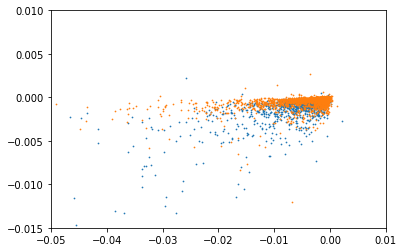

In [11]:
plt.scatter(goodss['redshift']*(goodss['hst.wfc.F606W']-goodss['hst.wfc3.F125W']),\
            goodss['redshift']*(goodss['UVIMOS']-goodss['hst.wfc.F606W']), s = 0.5)
plt.scatter(cosmos['redshift']*(cosmos['subaru.suprime.V']-cosmos['UKIRT_WFCJ']),\
            cosmos['redshift']*(cosmos['cfht.megacam.u']-cosmos['subaru.suprime.V']), s = 0.5)
plt.ylim(-0.015, 0.010)
plt.xlim(-0.05, 0.010)

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


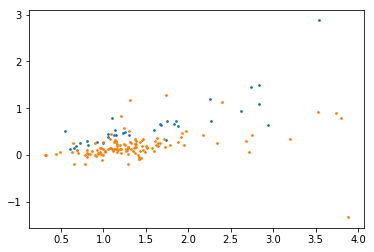

In [12]:
COSMOS_final_sample = Final_CIGALE

V = GOODSS_final_sample['redshift']*(GOODSS_final_sample['hst.wfc.F606W'])
J = GOODSS_final_sample['redshift']*(GOODSS_final_sample['hst.wfc3.F125W'])
U = GOODSS_final_sample['redshift']*(GOODSS_final_sample['UVIMOS'])

U_V = -2.5*np.log10(U*1e-3/3631.0) + 2.5*np.log10(V*1e-3/3631.0) 
V_J = -2.5*np.log10(V*1e-3/3631.0) + 2.5*np.log10(J*1e-3/3631.0) 

V_1 = COSMOS_final_sample['redshift']*(COSMOS_final_sample['subaru.suprime.V'])
J_1 = COSMOS_final_sample['redshift']*(COSMOS_final_sample['UKIRT_WFCJ'])
U_1 = COSMOS_final_sample['redshift']*(COSMOS_final_sample['cfht.megacam.u'])

U_V_1 = -2.5*np.log10(U_1*1e-3/3631.0) + 2.5*np.log10(V_1*1e-3/3631.0) 
V_J_1 = -2.5*np.log10(V_1*1e-3/3631.0) + 2.5*np.log10(J_1*1e-3/3631.0) 


plt.scatter(V_J, U_V, s = 3)
plt.scatter(V_J_1, U_V_1, s = 3)
# plt.ylim(0.0, 2.5)
# plt.xlim(0, 2.5)